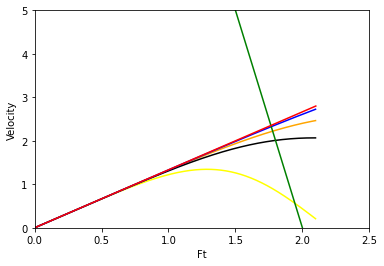

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m1 = 0.1
m2 = 0.75
V0 = 20
R = 0.3
vf = 2.353
g1 = 0
g2 = 9.81
n = 1000
grad = 57.2958

# Funzioni Lineari a e b
Ft = np.linspace(0, 2.1, 1000)
def V1x(x):
    return V0 - x / m1

V1X = V1x(Ft)

def v2(x):
    return x / m2
V2 = v2(Ft)


# Funzioni d e d'
def V2x(x, y):
    return y * np.cos(x)                                                 # Continua dopo perchè mi servono teta e V2 dall'eq. diff

# Runge-Kutta per c e c'
def f(x, v, F, g):
    return (((F * np.cos(x)) / (m2 + (m1 * (np.sin(x)) ** 2))) - ((m1 * (v ** 2) * (np.sin(x)) ** 2)/(2 * R * (m2 + (m1 * (np.sin(x) ** 2))))) - (((m1 + m2) * g * np.sin(x))/(m2 + (m1 * (np.sin(x)) ** 2))))

def f_2(x, csi, F, g):
    return f(x, R * F * csi, F, g) / ((F ** 2) * R)

def f_3(x, csi, F, g):
    return f(x, R * csi, F, g) / R

x0 = 0
csi0 = 0
t0 = 0
def RK4(F, func, fine, g):
    h = fine / n
    t = t0
    x = x0
    csi = csi0
    T = np.zeros(n)
    X = np.zeros(n)
    V = np.zeros(n)
    for i in range(n):
        T[i] = t
        X[i] = x
        if func == f_2:
            V[i] = R * F * csi
        elif func == f_3:
            V[i] = R * csi

        K1 = h * csi
        M1 = h * func(x, csi, F, g)

        K2 = h * (csi + M1/2)
        M2 = h * func(x + (K1/2), csi+(M1/2), F, g)

        K3 = h * (csi + (M2/2))
        M3 = h * func(x + (K2/2), csi + (M2/2), F, g)

        K4 = h * (csi + (M3/2))
        M4 = h * func(x + K3, csi + M3, F, g)

        x += (K1/6) + (K2/3) + (K3/ 3) + (K4/6)
        csi += (M1/6) + (M2/3) + (M3/3) + (M4/6)
        t = t + h

    M = np.array((T, X, V))
    return M                              # M è una matrice con 3 righe ed n colonne. La prima riga è quella del tempo, la seconda riga è quella di teta e la terza riga è V (Tutto in funzione di Ft grazie alla trasformazione di coordinate)


# Possiamo scrivere d e d'
G6 = RK4(6, f_2, 2.1, g1)
V2x_6 = V2x(G6[1], G6[2])                            # d'

G22 = RK4(22, f_2, 2.1, g1)
V2x_22 = V2x(G22[1], G22[2])                         # d

#Plottiamo tutte e 6 le Curve
plt.plot(G6[0], V2x_6, color="yellow")         # d'
plt.plot(G22[0], V2x_22, color="orange")        # d

plt.plot(G6[0], G6[2], color="black")          # c'
plt.plot(G22[0], G22[2], color="blue")           # c

plt.plot(Ft, V1X, color="green")               # a
plt.plot(Ft, V2, color="red")                  # b

plt.xlabel("Ft")
plt.ylabel("Velocity")
plt.xlim(0, 2.5)
plt.ylim(0, 5)
plt.show()


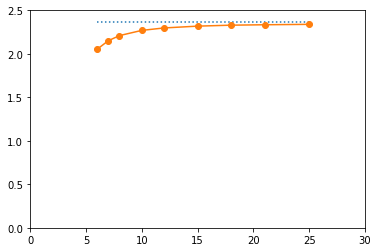

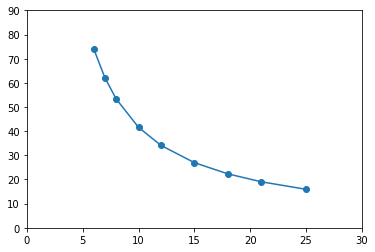

In [2]:
#FIGURA 4
FF = np.array((6, 7, 8, 10, 12, 15, 18, 21, 25))

G7 = RK4(7, f_2, 2.1, g1)
V2x_7 = V2x(G7[1], G7[2])

G8 = RK4(8, f_2, 2.1, g1)
V2x_8 = V2x(G8[1], G8[2])

G10 = RK4(10, f_2, 2.1, g1)
V2x_10 = V2x(G10[1], G10[2])

G12 = RK4(12, f_2, 2.1, g1)
V2x_12 = V2x(G12[1], G12[2])

G15 = RK4(15, f_2, 2.1, g1)
V2x_15 = V2x(G15[1], G15[2])

G18 = RK4(18, f_2, 2.1, g1)
V2x_18 = V2x(G18[1], G18[2])

G21 = RK4(21, f_2, 2.1, g1)
V2x_21 = V2x(G21[1], G21[2])

G25 = RK4(25, f_2, 2.1, g1)
V2x_25 = V2x(G25[1], G25[2])

TG = np.array((G6[0], G7[0], G8[0], G10[0], G12[0], G15[0], G18[0], G21[0], G25[0]))
AG = np.array((G6[1], G7[1], G8[1], G10[1], G12[1], G15[1], G18[1], G21[1], G25[1]))
VG = np.array((G6[2], G7[2], G8[2], G10[2], G12[2], G15[2], G18[2], G21[2], G25[2]))
V = np.array((V2x_6, V2x_7, V2x_8, V2x_10, V2x_12, V2x_15, V2x_18, V2x_21, V2x_25))

def Inter(A, B, C, D):
    e = 0.005
    ind = []
    for i in range(n):
        for j in range(n):
            if abs(A[i] - B[j]) <= e and abs(C[i] - D[j]) <= e:
                ind.append(i)
    return ind[0]

indici = np.zeros(len(FF))
for l in range(len(FF)):
    indici[l] = Inter(Ft, TG[l], V1X, V[l])
indici = np.array(indici, dtype = int)

Vfinali = np.zeros(len(FF))
for i in range(len(FF)):
    Vfinali[i] = VG[i, indici[i]]

Afinali = np.zeros(len(FF))
for i in range(len(FF)):
    Afinali[i] = AG[i, indici[i]]

A = np.ones(len(FF))
plt.plot(FF, A*2.365, linestyle=":")
plt.plot(FF, Vfinali, marker="o")
plt.ylim(0, 2.5)
plt.xlim(0, 30)
plt.show()

plt.plot(FF, Afinali*grad, marker="o")
plt.ylim(0, 90)
plt.xlim(0, 30)
plt.show()

In [14]:
#FIGURA5


tfin = 0.3
h = tfin / n
theta0 = 0
eta0 = 0
t0 = 0


J25 = RK4(25, f_3, 0.5, g2)
J6 = RK4(6, f_3, 0.5, g2)


def seno(alpha):
    return (-(g2/R)*np.sin(alpha))

def alpha_func(tempo0, alpha0, v0):
    alpha = alpha0
    omega = v0/R
    tempo = tempo0
    TT = np.zeros(n)
    AL = np.zeros(n)
    OM = np.zeros(n)
    for i in range(n):
        TT[i] = tempo

        K1 = h * omega
        M1 = h * seno(alpha)

        K2 = h * (omega + M1 / 2)
        M2 = h * seno(alpha + (K1 / 2))

        K3 = h * (omega + M2 / 2)
        M3 = h * seno(alpha + (K2 / 2))

        K4 = h * (omega + M3 / 2)
        M4 = h * seno(alpha + K3)

        alpha += (K1/6) + (K2/3) + (K3/3) + (K4/6)
        omega += (M1/6) + (M2/3) + (M3/3) + (M4/6)

        AL[i] = alpha
        OM[i] = omega

        tempo = tempo + h

    MALPHA = np.array((TT, AL, OM))
    return MALPHA

G3 = alpha(0, 0, V0*m1/(m2+m1))                              #moto del pendolo balistico fast collisions case


[645 142]


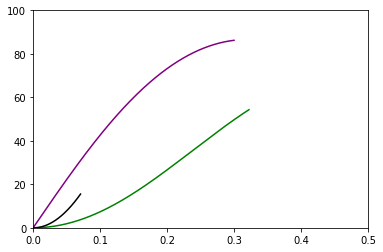

In [15]:
#devo rifare la procedura di intersezione, ma con il runge kutta calcolato per risolvere f_3 (ossia a F fissato, variando solo i tempi). 
#è richiesto per F=6, F=25

Tempi = np.linspace(0, 0.5, 1000)

V1x_J6= V1x(6*Tempi)
V1x_J25 = V1x(25*Tempi)
V2x_J6 = V2x(J6[1], J6[2])
V2x_J25 = V2x(J25[1], J25[2])
TJ = np.array((J6[0], J25[0]))
AJ = np.array((J6[1], J25[1]))
VJ1x = np.array((V1x_J6, V1x_J25)) 
VJ2x = np.array((V2x_J6, V2x_J25))

index = np.zeros(2)
index[0] = Inter(Tempi, J6[0], V1x_J6, VJ2x[0])
#index[0] = Inter(Tempi, TJ[0], VJ1x[0], VJ2x[0])
#index[1] = Inter(Tempi, TJ[1], VJ1x[1], VJ2x[1])
index[1] = Inter(Tempi, J25[0], V1x_J25, VJ2x[1])

index=np.array(index, dtype=int)
print(index)





plt.plot(G3[0], G3[1]*grad, color = "purple")
plt.plot(J6[0, :index[0]], J6[1, :index[0]]*grad, color = "green")


plt.plot(J25[0, :index[1]], J25[1, :index[1]]*grad, color="black")

plt.xlim(0, 0.5)
plt.ylim(0, 100)
plt.show()



#aggiungere le linee tratteggiate



In [19]:
G6_2 = RK4(6, f_3, 0.5, g2)
V1x6_2= V1x(6*Tempi)
V2x6_2 = V2x(G6_2[1], G6_2[2])


G7_2 = RK4(7, f_3, 0.5, g2)
V1x7_2= V1x(7*Tempi)
V2x7_2 = V2x(G7_2[1], G7_2[2])

G8_2 = RK4(8, f_3, 0.5, g2)
V1x8_2= V1x(8*Tempi)
V2x8_2 = V2x(G8_2[1], G8_2[2])

G10_2 = RK4(10, f_3, 0.5, g2)
V1x10_2= V1x(10*Tempi)
V2x10_2 = V2x(G10_2[1], G10_2[2])

G12_2 = RK4(12, f_3, 0.5, g2)
V1x12_2= V1x(12*Tempi)
V2x12_2 = V2x(G12_2[1], G12_2[2])

G15_2 = RK4(15, f_3, 0.5, g2)
V1x15_2= V1x(15*Tempi)
V2x15_2 = V2x(G15_2[1], G15_2[2])

G18_2 = RK4(18, f_3, 0.5, g2)
V1x18_2= V1x(18*Tempi)
V2x18_2 = V2x(G18_2[1], G18_2[2])

G21_2 = RK4(21, f_3, 0.5, g2)
V1x21_2= V1x(21*Tempi)
V2x21_2 = V2x(G21_2[1], G21_2[2])

G25_2 = RK4(25, f_3, 0.5, g2)
V1x25_2= V1x(25*Tempi)
V2x25_2 = V2x(G25_2[1], G25_2[2])

TG_2 = np.array((G6_2[0], G7_2[0], G8_2[0], G10_2[0], G12_2[0], G15_2[0], G18_2[0], G21_2[0], G25_2[0]))
AG_2 = np.array((G6_2[1], G7_2[1], G8_2[1], G10_2[1], G12_2[1], G15_2[1], G18_2[1], G21_2[1], G25_2[1]))
VG_2 = np.array((G6_2[2], G7_2[2], G8_2[2], G10_2[2], G12_2[2], G15_2[2], G18_2[2], G21_2[2], G25_2[2]))
V_1 = np.array((V1x6_2, V1x7_2, V1x8_2, V1x10_2, V1x12_2, V1x15_2, V1x18_2, V1x21_2, V1x25_2))
V_2 = np.array((V2x6_2, V2x7_2, V2x8_2, V2x10_2, V2x12_2, V2x15_2, V2x18_2, V2x21_2, V2x25_2))
AG_EQ = np.zeros(len(FF))
TG_EQ = np.zeros(len(FF))
VG_EQ = np.zeros(len(FF))


In [25]:
ind = np.zeros(len(FF))
for q in range(len(FF)):
    ind[q] = Inter(Tempi, TG_2[q], V_1[q], V_2[q] )
    
    ind = np.array(ind, dtype=int)
    AG_EQ[q] = AG_2[q, ind[q]]
    TG_EQ[q] = TG_2[q, ind[q]]
    VG_EQ[q] = VG_2[q, ind[q]]
print(AG_EQ*grad)
print(ind)

[54.41665036 50.50902362 46.16068669 38.52484255 32.55859102 26.24751841
 21.84709595 18.78510559 15.72846526]
[645 546 472 371 305 241 199 170 142]


In [36]:
OM0 = alpha_func(TG_EQ[0], AG_EQ[0], VG_EQ[0])    
OM1 = alpha_func(TG_EQ[1], AG_EQ[1], VG_EQ[1])
OM2 = alpha_func(TG_EQ[2], AG_EQ[2], VG_EQ[2])
OM3 = alpha_func(TG_EQ[3], AG_EQ[3], VG_EQ[3])
OM4 = alpha_func(TG_EQ[4], AG_EQ[4], VG_EQ[4])
OM5 = alpha_func(TG_EQ[5], AG_EQ[5], VG_EQ[5])
OM6 = alpha_func(TG_EQ[6], AG_EQ[6], VG_EQ[6])
OM7 = alpha_func(TG_EQ[7], AG_EQ[7], VG_EQ[7])
OM8 = alpha_func(TG_EQ[8], AG_EQ[8], VG_EQ[8])



TT_EQ = np.array((OM0[0], OM1[0], OM2[0], OM3[0], OM4[0], OM5[0], OM6[0], OM7[0], OM8[0]))
OM_EQ = np.array((OM0[2], OM1[2], OM2[2], OM3[2], OM4[2], OM5[2], OM6[2], OM7[2], OM8[2]))
AL_EQ = np.array((OM0[1], OM1[1], OM2[1], OM3[1], OM4[1], OM5[1], OM6[1], OM7[1], OM8[1]))
null = np.zeros(n)
null1 = np.zeros(n)
null2 = np.zeros(n)

indi = np.zeros(9)
angoli = np.zeros(9)



for l in range (len(FF)):
    indi[l]=Inter(null1, null2, OM_EQ[l], null)
    indi = np.array(indi, dtype=int)
    angoli[l] = AL_EQ[l, indi[l]]

print(indi)
print(angoli*grad)

    
#da questa alpha così definita voglio trovare il punto massimo. Fisicamente è il punto che corrisponde a omega minimo



[400 514 598 711 781 846 887 915 940]
[66.64867544 71.10929302 74.38586227 78.71766777 81.11792289 83.10483657
 83.99586762 84.73530912 85.06167649]


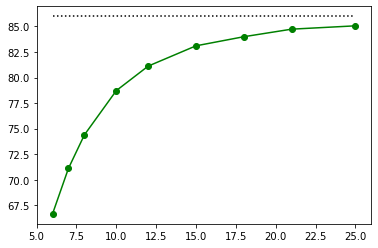

In [35]:
plt.plot(FF, np.ones(9)*86, linestyle=":", color = "black")
plt.plot(FF, angoli*grad, marker="o", color = "green")
plt.xlim(5,26)
plt.ylim=(10,100)
plt.show()